<a href="https://colab.research.google.com/github/achanhon/coursdeeplearningcolab/blob/master/debruitage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

petite illustration de comment on peut apprendre à "débruiter" des signaux

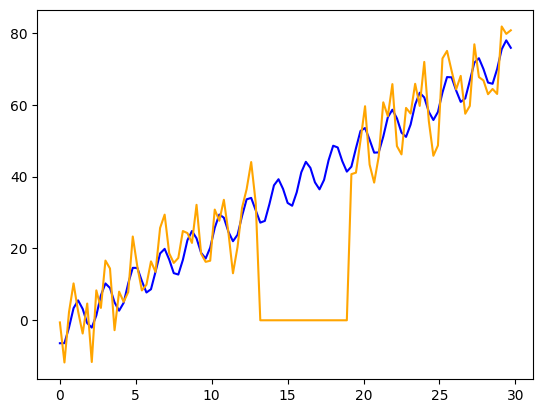

In [11]:
import torch

def generateTraj():
  x = torch.arange(100).float()*0.3
  param = (torch.rand(4)*3+1)*torch.sign(torch.rand(4)-0.5)
  signal = param[0]*x+param[1]+5*torch.cos(param[2]*x+param[3])

  signalbruitee = signal.clone()
  #bruit blanc
  signalbruitee += torch.rand(100)*20-10

  #suppression
  i = int(torch.rand(1)*50+25)
  signalbruitee[i-10:i+10]=0
  return x,signalbruitee,signal

import matplotlib.pyplot as plt
x,yn,y = generateTraj()
plt.plot(x, y, color='blue')
plt.plot(x, yn, color='orange')
plt.show()


In [ ]:
class Bloc(torch.nn.module):
  def __init__(self,Din,Dout):
    super(Bloc,self).__init__()
    self.conv1 = torch.nn.Conv1d(Din,Dout,kernel_size=11,padding=5,bias=False)
    self.bn1 = torch.nn.BatchNorm1d(Dout)
    self.conv2 = torch.nn.Conv1d(Dout,Dout,kernel_size=1,bias=False)
    self.bn2 = torch.nn.BatchNorm1d(Dout)

  def forward(self,x):
    x = self.bn1(self.conv1(x))
    x = torch.nn.functional.relu(x)
    x = self.conv2(self.bn2(x))
    return torch.nn.functional.relu(x)

class Net(torch.nn.module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = Bloc(2,8)
    self.conv2 = Bloc(10,16)
    self.conv3 = Bloc(18,32)
    self.final = torch.nn.Conv1d(32,1,kernel_size=1,bias=False)

  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    return self.final(x)[:,0]

net = Net().train()